<a href="https://colab.research.google.com/github/Nathalia-Prada/Sinergia_Bootcamp/blob/main/Punto_I_RiceClas_Boots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tematicas - Modulo I. Regresion Lineal
Diagrama de arbol
cluster
Boots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from google.colab import drive

In [2]:
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/contentdrive')

Drive already mounted at /content/contentdrive; to attempt to forcibly remount, call drive.mount("/content/contentdrive", force_remount=True).


In [5]:
data_RiceClas = pd.read_csv('/content/drive/MyDrive/IA_Data_Mining_2024_Agosto/Datos_curso/Proyecto/Punto_1/riceClassification.csv')

In [6]:
data_RiceClas.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [7]:
data_RiceClas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [8]:
print(data_RiceClas.columns)

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')


In [13]:
data_RiceClas_vf = data_RiceClas[['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class']]

In [14]:
data_RiceClas_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [15]:
data_RiceClas_vf.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [17]:
data_RiceClas_vf = data_RiceClas_vf.dropna()

In [18]:
data_RiceClas_vf.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [19]:
data_RiceClas.head()

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

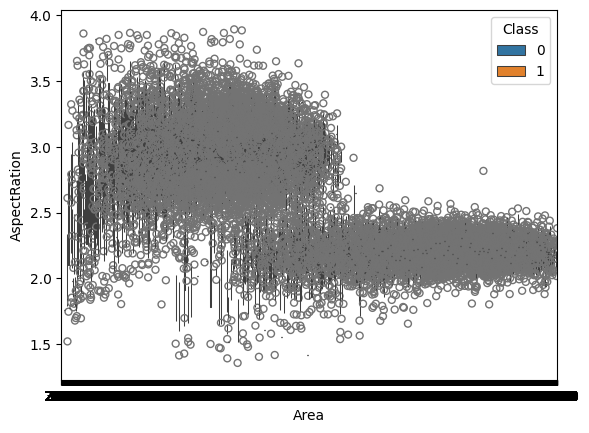

In [33]:
sns.boxenplot(data=data_RiceClas_vf,x='Area',y='AspectRation',hue='Class')
plt.show()

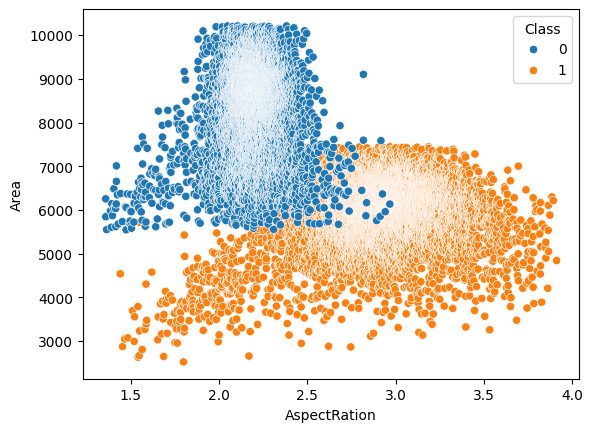

In [34]:
sns.scatterplot(data=data_RiceClas_vf,y='Area',x='AspectRation',hue='Class')
plt.show()

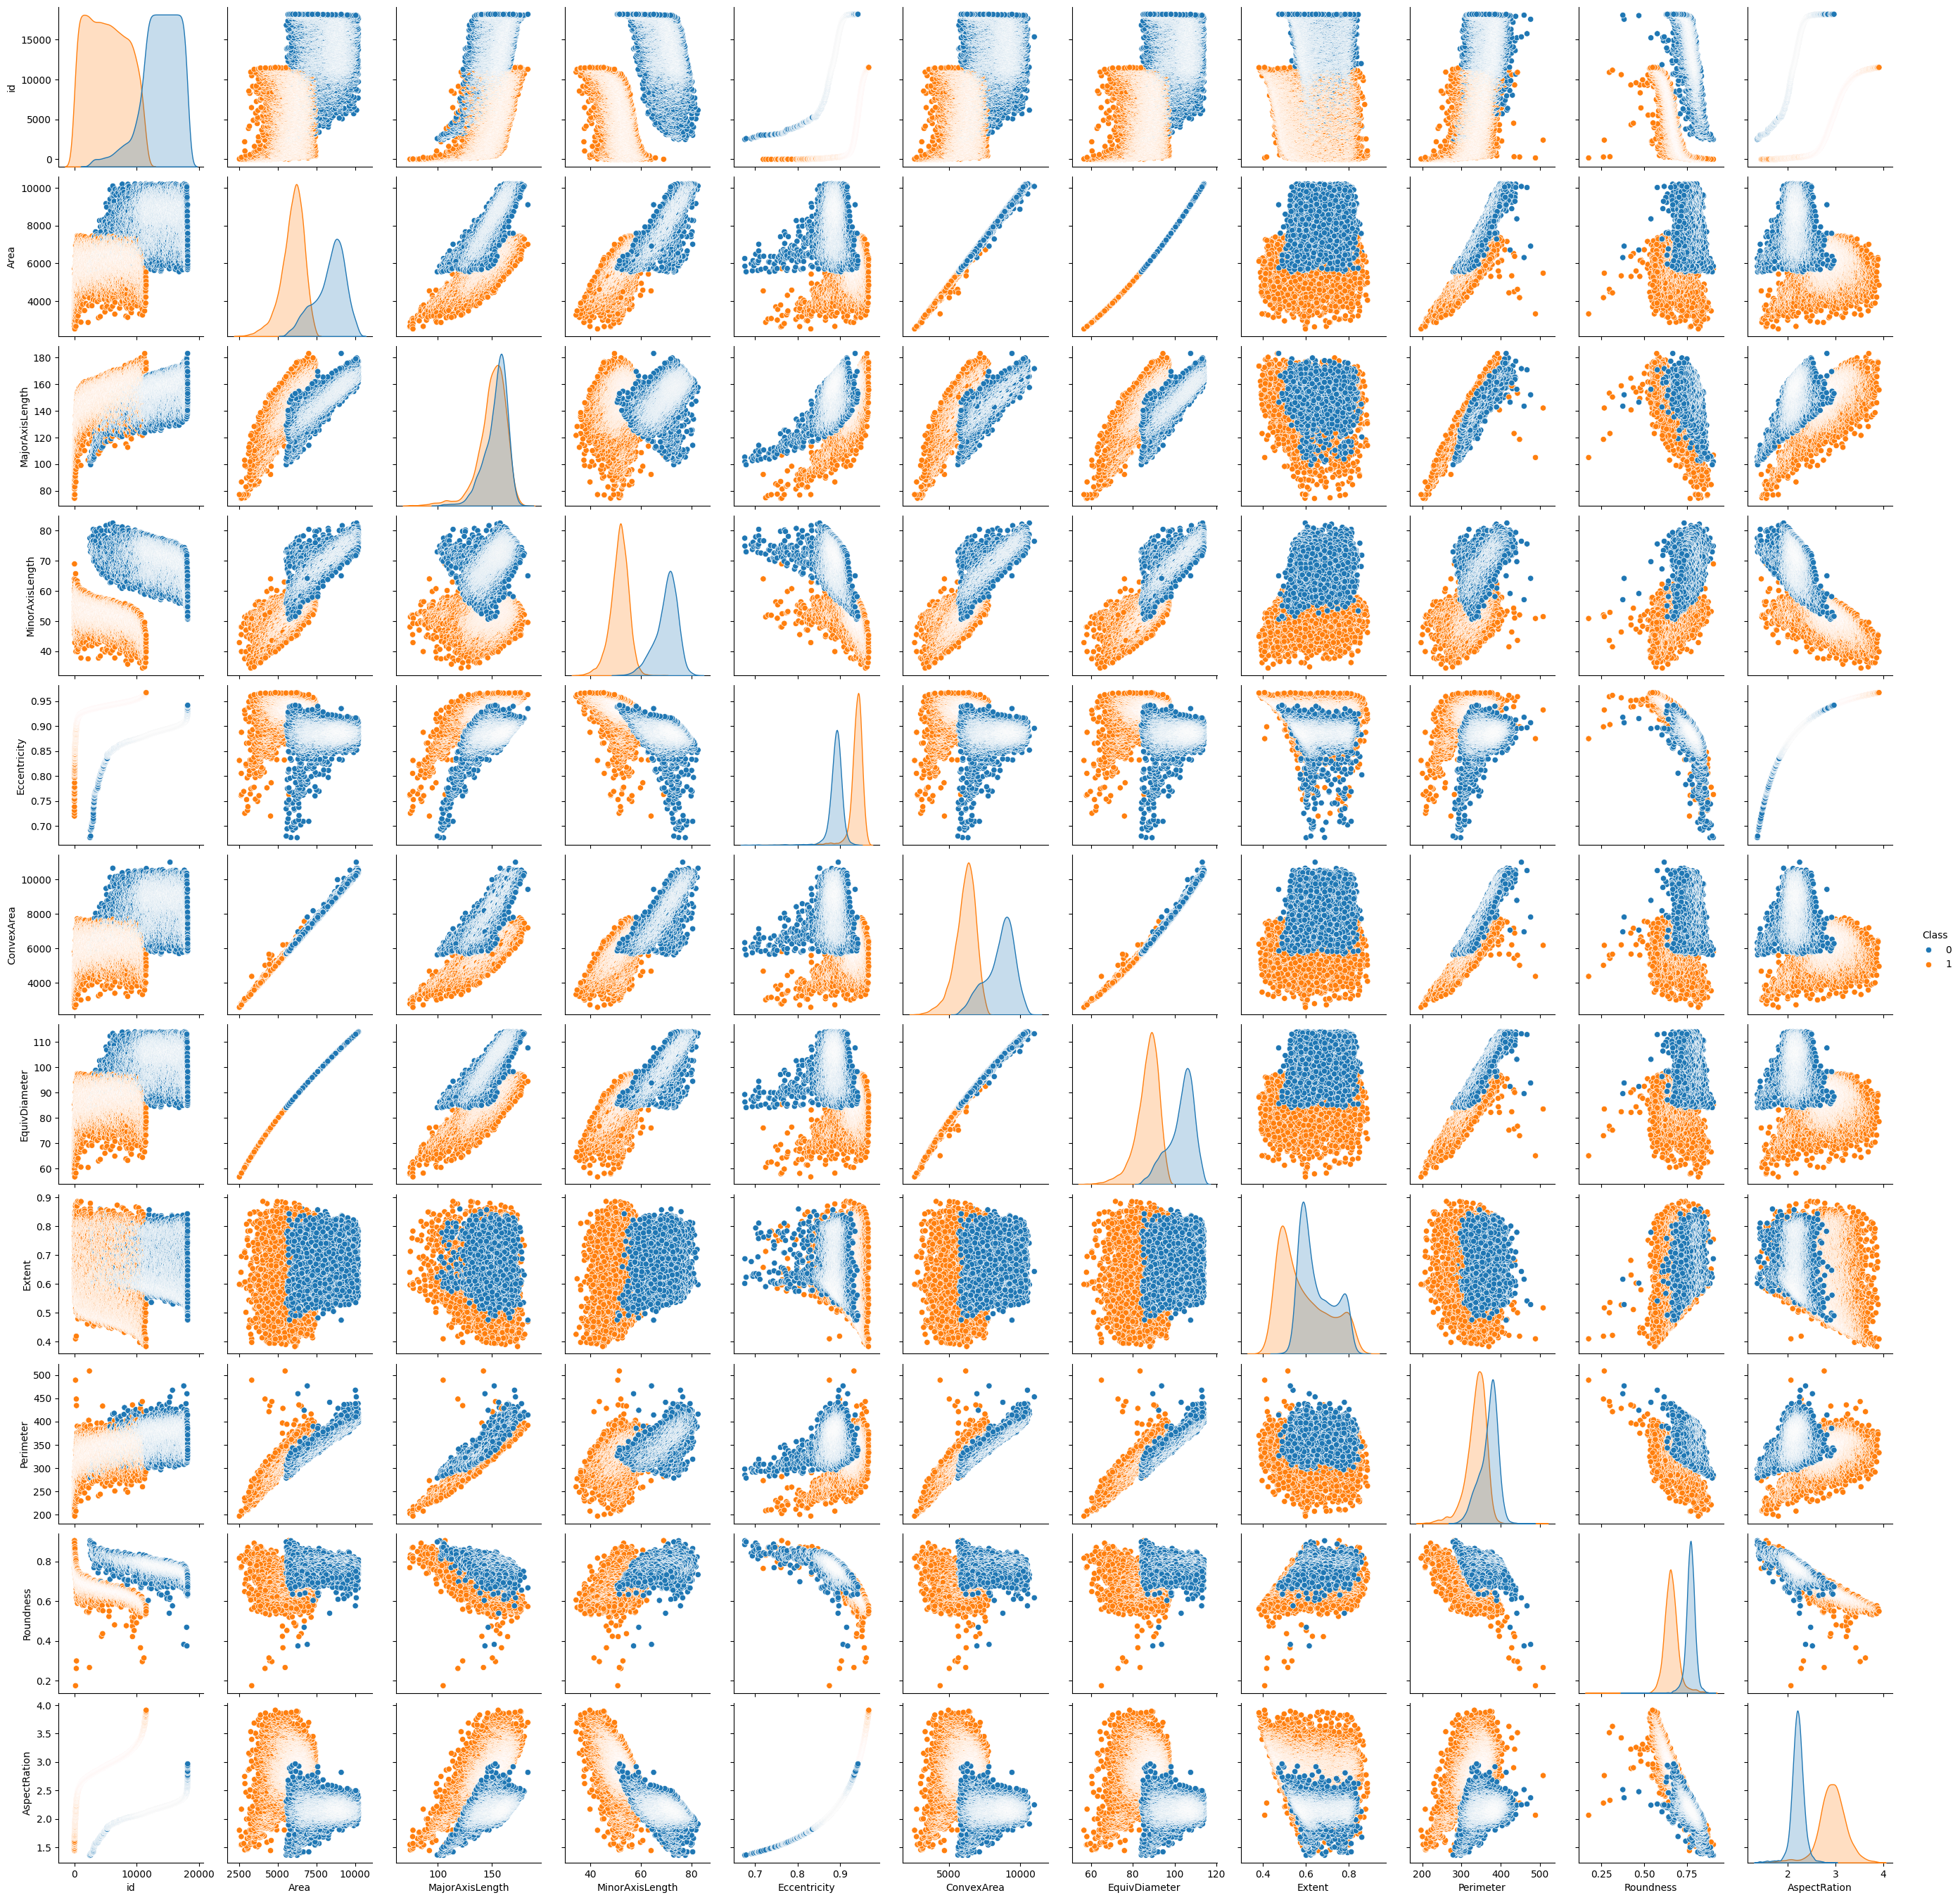

In [39]:
sns.pairplot(data=data_RiceClas_vf,hue='Class')
plt.show()

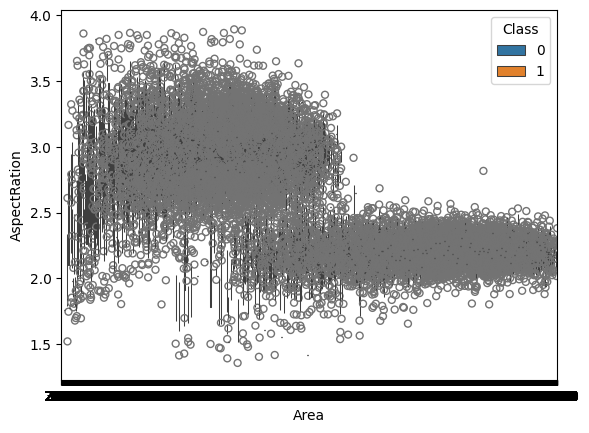

In [40]:
sns.boxenplot(data=data_RiceClas_vf,x='Area',y='AspectRation',hue='Class')
plt.show()

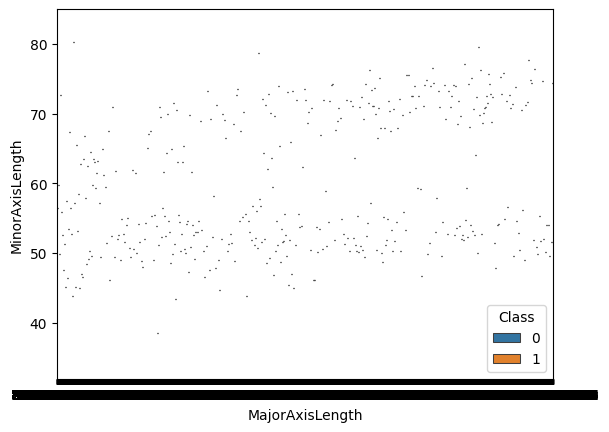

In [41]:
sns.boxenplot(data=data_RiceClas_vf,x='MajorAxisLength',y='MinorAxisLength',hue='Class')
plt.show()

In [42]:
X = data_RiceClas_vf.drop('Class',axis=1)
y = data_RiceClas_vf['Class']

In [43]:
y.value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

In [44]:
y.value_counts(normalize=True)

Class
1    0.549079
0    0.450921
Name: proportion, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

In [47]:
y_train.shape

(14548,)

In [48]:
y_test.shape

(3637,)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [51]:
print(X_train_sc)

[[ 2.56926953e-02  1.13997080e+00 -5.01418236e-02 ...  9.53918364e-01
   7.52265915e-01 -1.29691903e+00]
 [ 1.40875989e+00  1.74433392e+00  1.36455330e+00 ...  1.62759771e+00
   6.93524515e-01 -7.02475765e-01]
 [ 1.12572154e+00  4.16100834e-01 -2.80293664e-01 ...  3.92028694e-04
   1.02758368e+00 -8.39409157e-01]
 ...
 [-7.04998659e-01 -2.94111203e-01 -2.04072992e+00 ... -1.25927518e+00
   1.95552813e+00 -1.69254898e+00]
 [-1.56608915e+00 -3.74010057e-01 -3.46498512e-01 ... -4.70017911e-01
   1.01029482e-01 -2.77295155e-02]
 [ 1.27284826e+00  1.03002451e+00  4.74140651e-01 ...  8.72393743e-01
   6.85229358e-01 -7.75691032e-01]]


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression()

In [54]:
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test_sc)

In [56]:
print(y_pred)

[0 1 0 ... 1 0 0]


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
print(accuracy_score(y_test,y_pred))

1.0


In [59]:
print(confusion_matrix(y_test,y_pred))

[[1632    0]
 [   0 2005]]


In [60]:
from sklearn.feature_selection import RFE

In [61]:
rfe = RFE(lr,n_features_to_select=4)
rfe.fit(X_train_sc,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', True, 1),
 ('Area', False, 2),
 ('MajorAxisLength', False, 3),
 ('MinorAxisLength', True, 1),
 ('Eccentricity', False, 6),
 ('ConvexArea', False, 4),
 ('EquivDiameter', True, 1),
 ('Extent', False, 8),
 ('Perimeter', False, 7),
 ('Roundness', False, 5),
 ('AspectRation', True, 1)]

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
arbclass = DecisionTreeClassifier(criterion='entropy',max_depth=4)
arbclass.fit(X_train_sc,y_train)
y_pred2 = arbclass.predict(X_test_sc)

In [65]:
print(accuracy_score(y_test,y_pred2))

0.9997250481165796


In [66]:
print(confusion_matrix(y_test,y_pred2))

[[1632    0]
 [   1 2004]]


In [67]:
arbclass2 = DecisionTreeClassifier(criterion='gini',max_depth=8)
arbclass2.fit(X_train_sc,y_train)
y_pred3 = arbclass2.predict(X_test_sc)

In [68]:
print(accuracy_score(y_test,y_pred3))

1.0


In [69]:
print(y_pred2)

[0 1 0 ... 1 0 0]


In [70]:
from sklearn.tree import plot_tree

In [71]:
X_train.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation'],
      dtype='object')

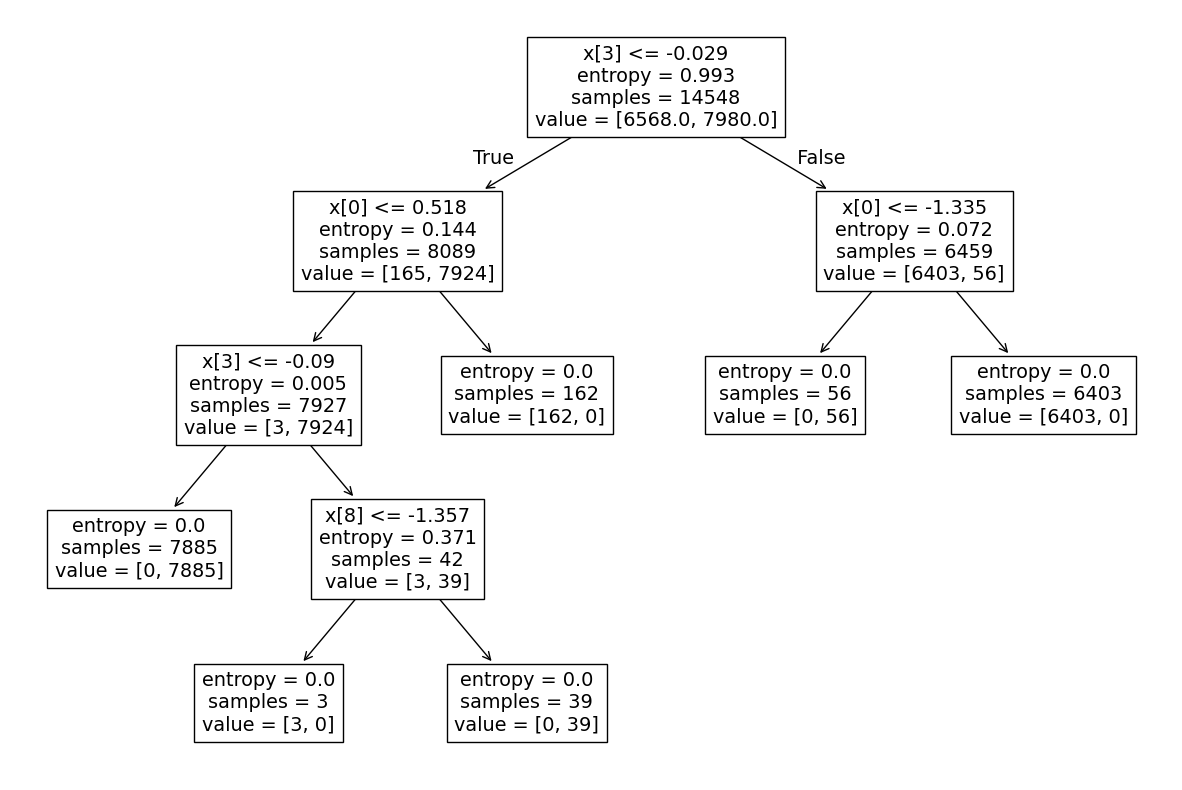

In [72]:
plt.figure(figsize=(15,10))
plot_tree(arbclass)
plt.show()

XGBoostClassifier

In [73]:
from xgboost import XGBClassifier

In [74]:
params ={'objective':'binary:logistic', 'max_depth':4,'learning_rate':0.3,'n_estimators':300}

In [75]:
xgbmodel = XGBClassifier(**params)
xgbmodel.fit(X_train_sc,y_train)
y_pred4 = xgbmodel.predict(X_test_sc)
print(y_pred4)

[0 1 0 ... 1 0 0]


In [76]:
print(accuracy_score(y_test,y_pred4))

1.0


In [77]:
print(confusion_matrix(y_test, y_pred))

[[1632    0]
 [   0 2005]]


In [78]:
from sklearn.neighbors import KNeighborsClassifier

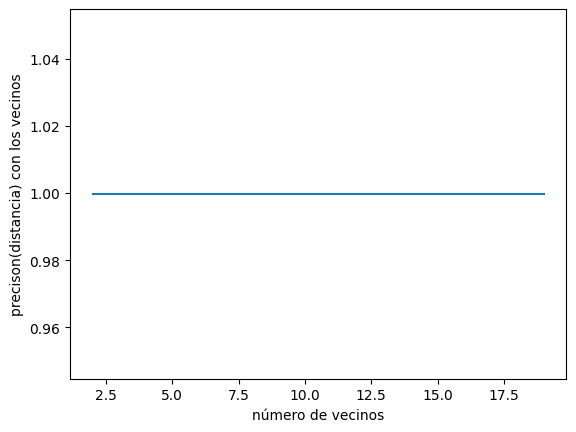

In [79]:
distancia = []
for i in range(2,20):
    knprueba = KNeighborsClassifier(n_neighbors=i)
    knprueba.fit(X_train_sc, y_train)
    distancia.append(knprueba.score(X_test_sc,y_test))

plt.plot(range(2,20),distancia)
plt.xlabel('número de vecinos')
plt.ylabel('precison(distancia) con los vecinos')
plt.show()

In [80]:
knfinal = KNeighborsClassifier(n_neighbors=17)
knfinal.fit(X_train_sc,y_train)
y_pred5 = knfinal.predict(X_test_sc)
print(y_pred5)

[0 1 0 ... 1 0 0]


In [81]:
print(accuracy_score(y_test,y_pred5))

0.9997250481165796


In [82]:
print(confusion_matrix(y_test,y_pred5))

[[1632    0]
 [   1 2004]]


In [ ]:
X_train.shape

(800000, 7)

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [84]:
params = {
    'learning_rate':[0.001,0.1,0.2,0.3],
    'subsample':[0.3,0.6,0.8],
    'n_estimators':[100,200,300]
}

In [85]:
modelohiper = XGBClassifier()

In [86]:
grid_model = GridSearchCV(estimator=modelohiper,param_grid=params,cv=4,scoring='accuracy',verbose=1)

In [87]:
grid_model.fit(X_train_sc, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.3, 0.6, 0.8]},
             scoring='accuracy', verbose=1)

In [88]:
print(grid_model.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.3}


In [89]:
print(grid_model.best_score_)

1.0


In [90]:
params2 = {
    'learning_rate':[0.002,0.2,0.3,0.4],
    'subsample':[0.2,0.7,0.9],
    'n_estimators':[100,200,300]
}

In [91]:
grid_model2 = GridSearchCV(estimator=modelohiper,param_grid=params2,cv=4,scoring='accuracy',verbose=1)

In [95]:
grid_model2.fit(X_train_sc, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.002, 0.2, 0.3, 0.4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.7, 0.9]},
             scoring='accuracy', verbose=1)

In [96]:
print(grid_model2.best_params_)

{'learning_rate': 0.2, 'n_estimators': 100, 'subsample': 0.7}


In [97]:
print(grid_model2.best_score_)

1.0


In [98]:
print(grid_model2.cv_results_)

{'mean_fit_time': array([0.15782923, 0.14473295, 0.14682478, 0.43763626, 1.14749861,
       0.2823689 , 0.36998081, 0.3805337 , 0.38412321, 0.09953797,
       0.10891378, 0.10631037, 0.15936166, 0.81232911, 0.56530333,
       0.19708687, 0.20340902, 0.19695473, 0.10056669, 0.09577376,
       0.09804899, 0.13733035, 0.14693373, 0.13593513, 0.19242769,
       0.19399816, 0.18436831, 0.09128994, 0.09077573, 0.0949648 ,
       0.15257663, 0.83406663, 0.54570568, 0.86118001, 0.19138378,
       0.17884421]), 'std_fit_time': array([0.0088075 , 0.00196794, 0.00954189, 0.3122159 , 1.12445179,
       0.02970373, 0.01395924, 0.00948197, 0.02424467, 0.00177762,
       0.00981125, 0.00375932, 0.01809322, 0.60133873, 0.42847275,
       0.00930191, 0.00837131, 0.00235168, 0.00878602, 0.0025835 ,
       0.01128958, 0.00289895, 0.00878201, 0.00362138, 0.00969966,
       0.01104757, 0.00520969, 0.0041402 , 0.00430426, 0.01121232,
       0.02917387, 0.32106286, 0.0618602 , 0.71355482, 0.00906491,
       

In [99]:
rand_model = RandomizedSearchCV(estimator=modelohiper, param_distributions=params, cv=4, scoring='accuracy',verbose=1)

In [100]:
rand_model.fit(X_train_sc,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.1, 0.2, 0.3],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.3, 0.6, 0.8]},
                   scoring='accuracy', verbose=1)

In [101]:
print(rand_model.best_params_)

{'subsample': 0.3, 'n_estimators': 100, 'learning_rate': 0.1}


In [102]:
print(rand_model.best_score_)

1.0
